In [44]:
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import entropy
from scipy.optimize import curve_fit
import datetime
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [45]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\JS_0531-0601')
file_list = glob.glob("./*.csv", recursive=True)

def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))

time_df = pd.DataFrame()

for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    if 'Time' in df.columns:
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'JS'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'JS'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3900 non-null   datetime64[ns]
 1   External Sound  3899 non-null   float64       
 2   type            3900 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 91.5+ KB


In [46]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'JS'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
        
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)   
      
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'JS'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'JS'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3768 non-null   datetime64[ns]
 1   Internal Sound  3768 non-null   float64       
 2   type            3768 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 88.4+ KB


In [47]:
os.chdir(r'C:\Users\pjk98\Data\Tension\JS')
file_list = glob.glob("./*.csv", recursive=True)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'JS'

Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\3411994181.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\3411994181.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


In [48]:
# 3개의 데이터프레임 병합
JS = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
JS = pd.merge(JS, In_STD_df, on='Time')
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
JS = JS.reindex(columns=new_order)
JS['type'] = '정상'
JS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3401 entries, 0 to 3400
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3401 non-null   datetime64[ns]
 1   Tension         3401 non-null   float64       
 2   Internal Sound  3401 non-null   float64       
 3   External Sound  3400 non-null   float64       
 4   type            3401 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 159.4+ KB


In [49]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\CMPS_20230531')
file_list = glob.glob("./*.csv", recursive=True)

def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))

time_df = pd.DataFrame()

for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    if 'Time' in df.columns:
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'CMPS'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'CMPS'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3541 non-null   datetime64[ns]
 1   External Sound  3541 non-null   float64       
 2   type            3541 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 83.1+ KB


In [50]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'CMPS'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
    
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True) 
        
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'CMPS'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'CMPS'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()
# 183초(3분3초) 손실

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3417 non-null   datetime64[ns]
 1   Internal Sound  3417 non-null   float64       
 2   type            3417 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 80.2+ KB


In [51]:
os.chdir(r'C:\Users\pjk98\Data\Tension\CMPS')
file_list = glob.glob("./*.csv", recursive=True)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'CMPS'

Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\2937010651.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\2937010651.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


In [52]:
# 3개의 데이터프레임 병합
CMPS = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
CMPS = pd.merge(CMPS, In_STD_df, on='Time')
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
CMPS = CMPS.reindex(columns=new_order)
CMPS['type'] = '측면마모'
CMPS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 0 to 3328
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3329 non-null   datetime64[ns]
 1   Tension         3329 non-null   float64       
 2   Internal Sound  3329 non-null   float64       
 3   External Sound  3329 non-null   float64       
 4   type            3329 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 156.0+ KB


In [53]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\SSJD1_20230601')
file_list = glob.glob("./*.csv", recursive=True)

def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))

time_df = pd.DataFrame()

for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    if 'Time' in df.columns:
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'SSJD'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'SSJD'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3660 non-null   datetime64[ns]
 1   External Sound  3659 non-null   float64       
 2   type            3660 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.9+ KB


In [54]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'SSJD'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
    
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True) 
        
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'SSJD'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'SSJD'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3530 entries, 0 to 3529
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3530 non-null   datetime64[ns]
 1   Internal Sound  3530 non-null   float64       
 2   type            3530 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 82.9+ KB


In [55]:
os.chdir(r'C:\Users\pjk98\Data\Tension\SSJD1')
file_list = glob.glob("./*.csv", recursive=True)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'SSJD'

Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\1345883210.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\1345883210.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


In [56]:
# 3개의 데이터프레임 병합
SSJD = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
SSJD = pd.merge(SSJD, In_STD_df, on='Time')
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
SSJD = SSJD.reindex(columns=new_order)
SSJD['type'] = '심선절단'
SSJD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3413 entries, 0 to 3412
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3413 non-null   datetime64[ns]
 1   Tension         3413 non-null   float64       
 2   Internal Sound  3413 non-null   float64       
 3   External Sound  3412 non-null   float64       
 4   type            3413 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 160.0+ KB


In [57]:
os.chdir(r'C:\Users\pjk98\Data\New_Folder\SSNC7_20230601')
file_list = glob.glob("./*.csv", recursive=True)

def calculate_peak(stats):
    return np.array([np.max(stats)])
def rms(stats):
    return(np.sqrt(np.mean(stats**2, axis=0)))

time_df = pd.DataFrame()

for file in file_list:
    # CSV 파일 읽기
    df = pd.read_csv(file)
    
    if 'Time' in df.columns:
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True)

rms_arr = np.array([])
peak_arr = np.array([])

for file in file_list:
    # 데이터 파일 읽기
    df = pd.read_csv(file, sep=',', header=0)
    drop_columns = ['Unnamed: 0', 'Time', 'Ambient Temp.', 'Target Temp.']  # 신호처리할 필요 없는 컬럼
    df.drop(labels=drop_columns, axis=1, inplace=True)  # 불필요한 컬럼 제거
    
    # value 추출
    rms_value = rms(df.values)
    peak = calculate_peak(df.values)
    
    rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
    peak_arr = np.concatenate([peak_arr, peak], axis=0)
rms_arr = rms_arr.reshape(len(file_list), 1)
peak_arr = peak_arr.reshape(len(file_list), 1)

Ex_RMS_df = pd.DataFrame(rms_arr, columns=['External Sound'])
Ex_PEAK_df = pd.DataFrame(peak_arr, columns=['External Sound'])
Ex_RMS_df['type'] = 'SSNC'
Ex_RMS_df['Time'] = time_df
Ex_PEAK_df['type'] = 'SSNC'
Ex_PEAK_df['Time'] = time_df
new_order = ['Time', 'External Sound', 'type']
Ex_RMS_df = Ex_RMS_df.reindex(columns=new_order)
Ex_PEAK_df = Ex_RMS_df.reindex(columns=new_order)
Ex_RMS_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df['Time'] = pd.to_datetime(Ex_RMS_df['Time'])
Ex_PEAK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3600 non-null   datetime64[ns]
 1   External Sound  3600 non-null   float64       
 2   type            3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


In [58]:
# JS, CMPS, SSJD, SSNC. 결측치 및 이상 데이터를 포함하는 행을 제외한 Internal Sound 열
# faulttypelist = ['CMPS', 'JS', 'SSJD', 'SSNC']
# for j in faulttypelist:

def rms(stats):
    return np.array([(np.sqrt(np.mean(stats**2, axis=0)))])

j = 'SSNC'
os.chdir("C:\\Users\\pjk98\Data\\BeltforSharing\\Belt_"+j)
filelist = glob.glob('**/*.txt', recursive=True)

rms_arr = np.array([])
std_arr = np.array([]) 

time_df = pd.DataFrame()
for i in range(len(filelist)):
    currentfile = datetime.datetime(2023, int(filelist[i][:2]), int(filelist[i][3:5]), int(filelist[i][6:8]), int(filelist[i][9:11]), int(filelist[i][12:14]))
    with open(filelist[i], 'r') as file:
        data = []
        for line in file:
            values = line.strip().split(',')
            if len(values) == 3:
                data.append(values)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(data, columns=['Internal Sound', 'Ambient Temp.', 'Target Temp.']) # 동적 변수 생성
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Internal Sound'].astype(int)
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Ambient Temp.'].astype(float) # 온도 데이터 필요할 때 살리세요.
        # globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'] = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Target Temp.'].astype(float)
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")] = pd.DataFrame(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")].loc[:, 'Internal Sound']) # 온도 데이터 필요할 때 죽이세요.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = currentfile # Time 열 추가. 모든 행이 같은 시각.
        globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'] = pd.to_datetime(globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]['Time'])
        df = globals()['A_'+currentfile.strftime("%m%d_%H%M%S")]
        
        # rms value 추출
        rms_value = rms(df['Internal Sound'].values)
        std = np.array([(df['Internal Sound'].values).std()])
        rms_arr = np.concatenate([rms_arr, rms_value], axis=0)
        std_arr = np.concatenate([std_arr, std], axis=0)
    
    if 'Time' in df.columns:
        # 첫 번째 'Time' 컬럼 값만 선택하여 데이터프레임에 추가
        time_value = df['Time'].iloc[0]
        df = pd.DataFrame({'Time': [time_value]})
        time_df = pd.concat([time_df, df], ignore_index=True) 
        
rms_arr = rms_arr.reshape(len(filelist), 1)
std_arr = std_arr.reshape(len(filelist), 1)
In_RMS_df = pd.DataFrame(rms_arr, columns=['Internal Sound'])
In_RMS_df['type'] = 'SSNC'
In_RMS_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_RMS_df = In_RMS_df.reindex(columns=new_order)
In_STD_df = pd.DataFrame(std_arr, columns=['Internal Sound'])
In_STD_df['type'] = 'SSNC'
In_STD_df['Time'] = time_df
new_order = ['Time','Internal Sound','type']
In_STD_df = In_STD_df.reindex(columns=new_order)
In_STD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3556 entries, 0 to 3555
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3556 non-null   datetime64[ns]
 1   Internal Sound  3556 non-null   float64       
 2   type            3556 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 83.5+ KB


In [59]:
os.chdir(r'C:\Users\pjk98\Data\Tension\SSNC7')
file_list = glob.glob("./*.csv", recursive=True)

# for i in range(len(file_list)):
Tension_df = pd.read_csv(file_list[0], sep=',',header=0,encoding='CP949')
Tension_df.columns=['Time','Tension','이건 뭐징??']
drop_columns=['이건 뭐징??']
Tension_df.drop(labels=drop_columns, axis=1, inplace=True) # 불필요한 컬럼 제거
Tension_df['type'] = 'SSNC'

Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')
Tension_df['Time'] = pd.to_datetime(Tension_df['Time'])
Tension_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3600 non-null   datetime64[ns]
 1   Tension  3600 non-null   float64       
 2   type     3600 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 84.5+ KB


C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\1216411915.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\[|\]', '')
C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\1216411915.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  Tension_df['Time'] = Tension_df['Time'].str.replace(r'\/', '-')


In [60]:
# 3개의 데이터프레임 병합
SSNC = pd.merge(Tension_df, Ex_PEAK_df, on='Time')
SSNC = pd.merge(SSNC, In_STD_df, on='Time')
new_order = ['Time','Tension','Internal Sound', 'External Sound', 'type']
SSNC = SSNC.reindex(columns=new_order)
SSNC['type'] = '심선노출'
SSNC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3485 entries, 0 to 3484
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            3485 non-null   datetime64[ns]
 1   Tension         3485 non-null   float64       
 2   Internal Sound  3485 non-null   float64       
 3   External Sound  3485 non-null   float64       
 4   type            3485 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 163.4+ KB


In [61]:
# join() 메소드를 활용하여 데이터프레임을 합칠 수는 있으나 인덱스값이 중복되면 불가능해지기 때문에 이런 코드를 작성하였습니다.

Final_df = pd.DataFrame()

for df in [JS, CMPS, SSJD, SSNC]:
    # 데이터프레임을 행 방향으로 추가
    Final_df = Final_df.append(df, ignore_index=True) # ignore_index=True는 '인덱스 재설정' 파라미터 입니다.

print(len(CMPS))
print(len(JS))
print(len(SSJD))
print(len(SSNC))
print(len(Final_df))

3329
3401
3413
3485
13628


C:\Users\pjk98\AppData\Local\Temp\ipykernel_24024\1621797008.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_df = Final_df.append(df, ignore_index=True) # ignore_index=True는 '인덱스 재설정' 파라미터 입니다.


In [64]:
Final_df

,Time,Tension,Internal Sound,External Sound,type
0,2023-05-31 23:35:19,110.0,200.545969,511.863789,정상
1,2023-05-31 23:35:20,111.0,198.577450,512.422717,정상
2,2023-05-31 23:35:21,110.0,199.740032,511.171249,정상
3,2023-05-31 23:35:22,108.0,203.516083,515.412365,정상
4,2023-05-31 23:35:23,108.0,212.626293,513.196902,정상
...,...,...,...,...,...
13623,2023-06-01 17:03:55,155.0,195.787997,529.765401,심선노출
13624,2023-06-01 17:03:56,169.0,212.194068,528.273556,심선노출
13625,2023-06-01 17:03:57,169.0,214.174676,528.628405,심선노출
13626,2023-06-01 17:03:58,158.0,203.015907,530.412455,심선노출


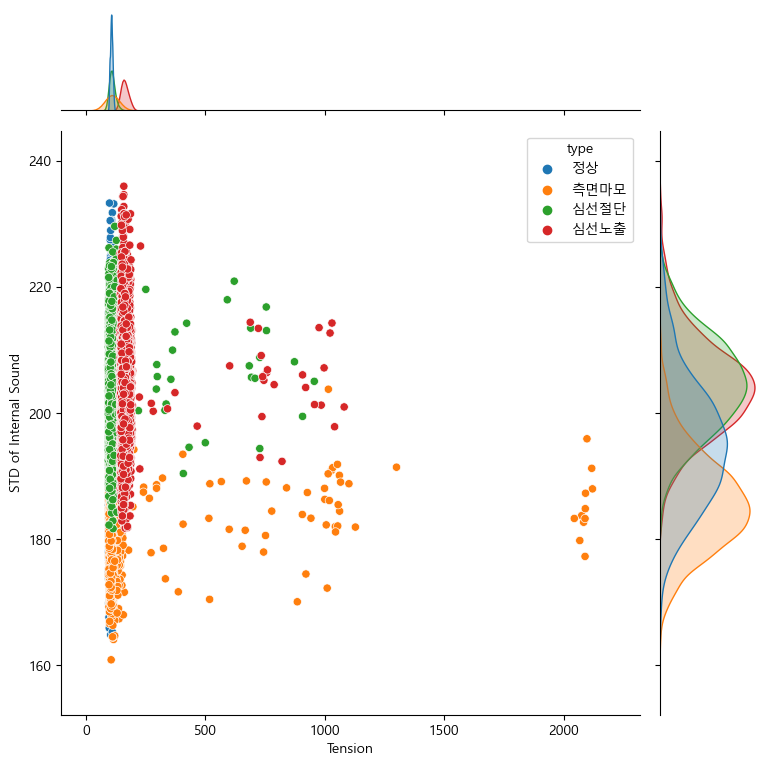

In [80]:
j = sns.jointplot(x='Tension', y='Internal Sound', data=Final_df, hue='type') # x='Tension', y = 'Internel Sound',z='Target Temp.', data = df, hue='type'

# plt.suptitle("상관관계 그래프", fontsize=20, y=0.935)
plt.xlabel('Tension')
plt.ylabel('STD of Internal Sound')

# 그래프 크기 조정
j.fig.set_figwidth(8)  # 가로 크기 조정
j.fig.set_figheight(8)  # 세로 크기 조정

plt.show()